In [1]:
import pandas as pd
import os
import glob
import io 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from brainspace.gradient import GradientMaps
from sklearn.metrics.pairwise import cosine_similarity
import dill
import nibabel as nib
from math import pi
from nilearn.image import load_img
from nilearn import plotting


In [2]:
grey_img = nib.load('/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/greymatter.nii.gz')
grey_data = grey_img.get_fdata()


grey_data[(grey_data == 12) | (grey_data == 11) | (grey_data == 26)] = -10
grey_data[grey_data >-9] = 0
grey_data[grey_data <-9] = 1

final_img = nib.Nifti1Image(grey_data, grey_img.affine, grey_img.header)
nib.save(final_img,'/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/LH_mask.nii.gz')


grey_img = nib.load('/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/greymatter.nii.gz')
grey_data = grey_img.get_fdata()


grey_data[(grey_data == 50) | (grey_data == 51) | (grey_data == 58)] = -10
grey_data[grey_data >-9] = 0
grey_data[grey_data <-9] = 1

final_img = nib.Nifti1Image(grey_data, grey_img.affine, grey_img.header)
nib.save(final_img,'/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/RH_mask.nii.gz')


In [3]:
def get_average_grad_df(emb_path):
    emb= dill.load(open(emb_path, "rb"))

    emb= emb.mean(axis=2)
    region='striatum'
    gradient_df = pd.DataFrame({region+'_grad_1': emb[:,0], region+'_grad_2': emb[:,1], region+'_grad_3': emb[:,2]})

    return gradient_df

grad_L_m12 = get_average_grad_df('../../derivatives/analysis/smoothed/gradients/bs_emb/aligned_emb_sbctx_L_month12.pickle')
grad_R_m12 = get_average_grad_df('../../derivatives/analysis/smoothed/gradients/bs_emb/aligned_emb_sbctx_R_month12.pickle')
grad_L_m24 = get_average_grad_df('../../derivatives/analysis/smoothed/gradients/bs_emb/aligned_emb_sbctx_L_month24.pickle')
grad_R_m24 = get_average_grad_df('../../derivatives/analysis/smoothed/gradients/bs_emb/aligned_emb_sbctx_R_month24.pickle')

#change month to Month when have time, also change in the snakefile


In [4]:
mask_img_L = nib.load('/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/LH_mask.nii.gz') #This image is transformed to mni space and reduced to low resolution
mask_data_L = mask_img_L.get_fdata()

mask_img_R = nib.load('/home/dimuthu1/scratch/PPMI_project2/PPMI_gradients/cfg/RH_mask.nii.gz') #This image is transformed to mni space and reduced to low resolution
mask_data_R = mask_img_R.get_fdata()

idx_L = np.where(mask_data_L > 0.9)
idx_R = np.where(mask_data_R > 0.9)


#for i in range(0,np.shape(idx)[1]):
#    mask_data_L[idx[0][i], idx[1][i], idx[2][i]]=grad1_L_m12_vals[i]

In [46]:
final_img = nib.Nifti1Image(mask_data_L, mask_img_L.affine, mask_img_L.header)
nifty_name = "final_image.nii.gz"
nib.save(final_img,nifty_name)


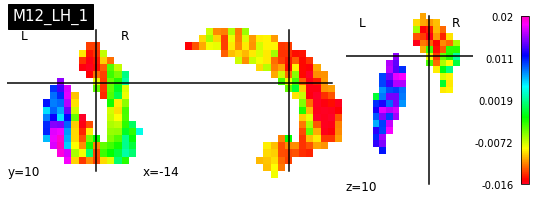

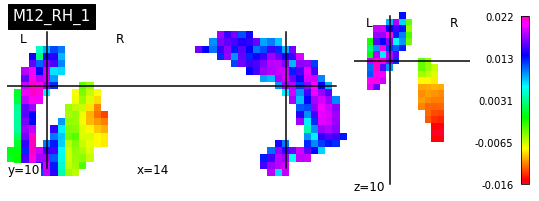

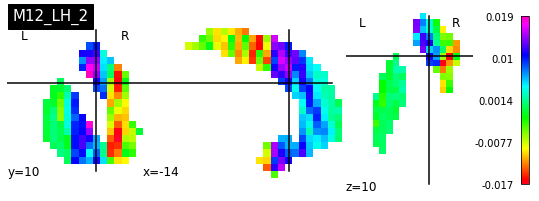

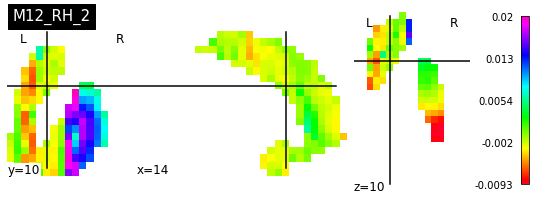

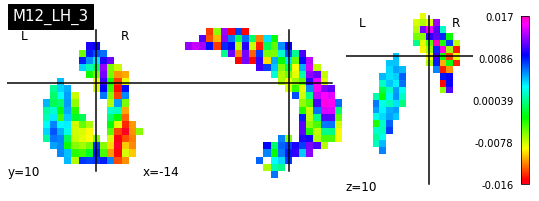

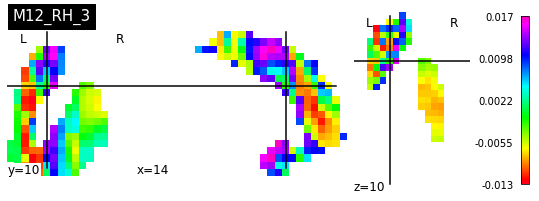

In [5]:
def get_projection(componant,df_L,df_R,out_path,ses):

    df_L_vals = df_L['striatum_grad_'+componant].values
    df_R_vals = df_R['striatum_grad_'+componant].values

    for i in range(0,np.shape(idx_L)[1]):
        mask_data_L[idx_L[0][i], idx_L[1][i], idx_L[2][i]]=df_L_vals[i]

    for i in range(0,np.shape(idx_R)[1]):
        mask_data_R[idx_R[0][i], idx_R[1][i], idx_R[2][i]]=df_R_vals[i]

    final_img_L = nib.Nifti1Image(mask_data_L, mask_img_L.affine, mask_img_L.header)
    nifty_name_L = out_path+'projected_'+ses+'_LH_grad_'+componant+'.nii.gz'
    nib.save(final_img_L,nifty_name_L)

    final_img_R = nib.Nifti1Image(mask_data_R, mask_img_R.affine, mask_img_R.header)
    nifty_name_R = out_path+'projected_'+ses+'_RH_grad_'+componant+'.nii.gz'
    nib.save(final_img_R,nifty_name_R)

    display_L = plotting.plot_img(final_img_L,
                    cut_coords=(-14, 10, 10),
                    threshold = 'auto',
                    title=ses+'_LH_'+componant,cmap='gist_rainbow', colorbar = True)

    display_L.savefig(out_path+'projected_'+ses+'_LH_grad_'+componant+'.png') 

    display_R = plotting.plot_img(final_img_R,
                    cut_coords=(14, 10, 10),
                    threshold = 'auto',
                    title=ses+'_RH_'+componant,cmap='gist_rainbow', colorbar = True)

    display_R.savefig(out_path+'projected_'+ses+'_RH_grad_'+componant+'.png') 

    #plotting.plot_glass_brain(final_img_R,display_mode='lyrz', cmap='gist_rainbow', threshold=0.007)
    

out_path='/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/smoothed/plots/'
get_projection('1',grad_L_m12,grad_R_m12,out_path,'M12')
get_projection('2',grad_L_m12,grad_R_m12,out_path,'M12')
get_projection('3',grad_L_m12,grad_R_m12,out_path,'M12')




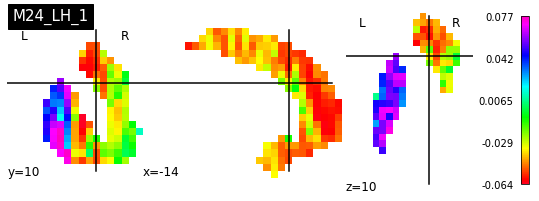

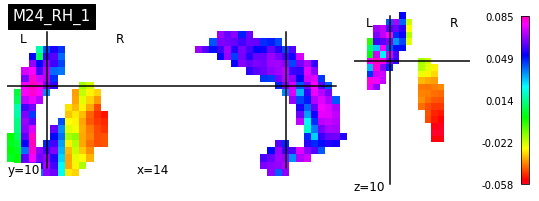

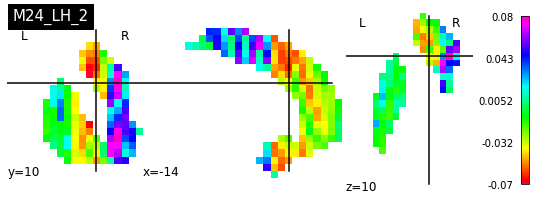

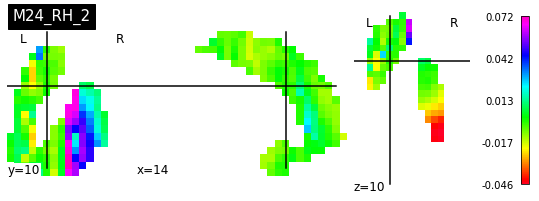

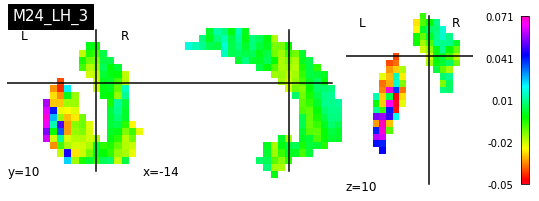

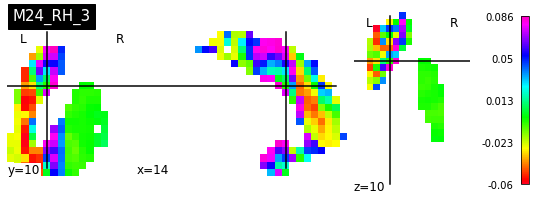

In [22]:

"""emb_L_m24 = matrix_dir+'emb_sbctx_L_Month24.pickle'
grad_L_m24 = get_grad_df(emb_L_m24)

emb_R_m24 = matrix_dir+'emb_sbctx_R_Month24.pickle'
grad_R_m24 = get_grad_df(emb_R_m24)"""


out_path='/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/structural/plots/'
get_projection('1',grad_L_m24,grad_R_m24,out_path,'M24')
get_projection('2',grad_L_m24,grad_R_m24,out_path,'M24')
get_projection('3',grad_L_m24,grad_R_m24,out_path,'M24')

In [49]:
plotting.plot_glass_brain(final_img_R, threshold=3)

NameError: name 'final_img_R' is not defined